In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# read in data

clientes = pd.read_csv('./data/todas/clientes.csv').drop('Unnamed: 0',axis=1)
productos = pd.read_csv('./data/todas/codprod.csv').drop('Unnamed: 0',axis=1)
materiales = pd.read_csv('./data/todas/materiales.csv').drop('Unnamed: 0',axis=1)
ventas = pd.read_csv('./data/M1.7/canal_muestra17.csv.gz')

In [3]:
# remove whitespaces from variables
ventas=pd.concat([ventas[x].str.strip() if ventas[x].dtype == object else ventas[x] for x in ventas.columns],axis=1)
clientes=pd.concat([clientes[x].str.strip() if clientes[x].dtype == object else clientes[x] for x in clientes.columns],axis=1)
productos=pd.concat([productos[x].str.strip() if productos[x].dtype == object else productos[x] for x in productos.columns],axis=1)
materiales=pd.concat([materiales[x].str.strip() if materiales[x].dtype == object else materiales[x] for x in materiales.columns],axis=1)

<Axes: xlabel='DAY_OF_WEEK', ylabel='INGRESOBRUTO'>

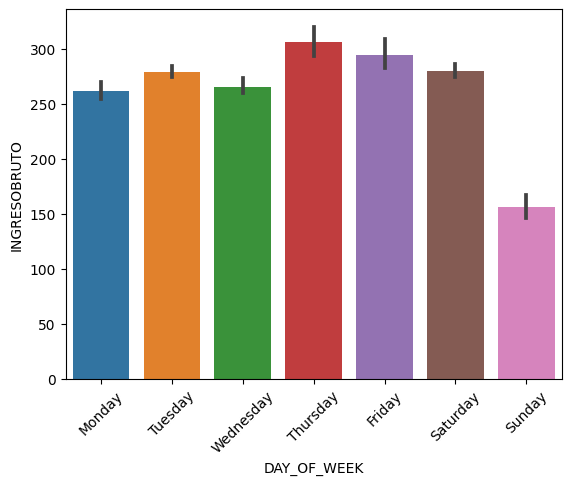

In [4]:
ts=sns.barplot(
    data=ventas,
    x='DAY_OF_WEEK',
    y='INGRESOBRUTO', 
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

for item in ts.get_xticklabels():
    item.set_rotation(45)

ts

<Axes: xlabel='YEAR_MONTH', ylabel='INGRESOBRUTO'>

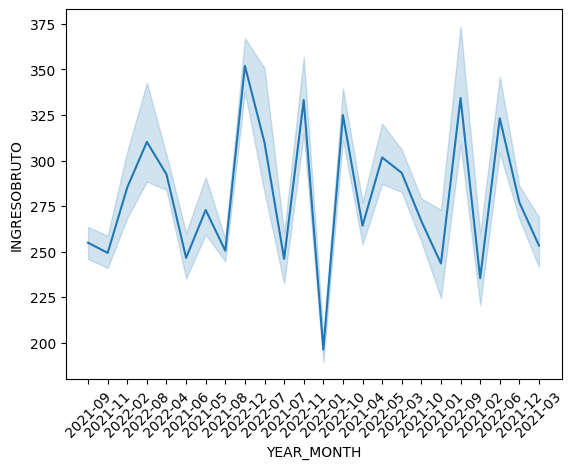

In [5]:
ts2 = sns.lineplot(
    data=ventas,
    x='YEAR_MONTH',
    y='INGRESOBRUTO'
)

for item in ts2.get_xticklabels():
    item.set_rotation(45)

ts2

<Axes: xlabel='MES', ylabel='INGRESOBRUTO'>

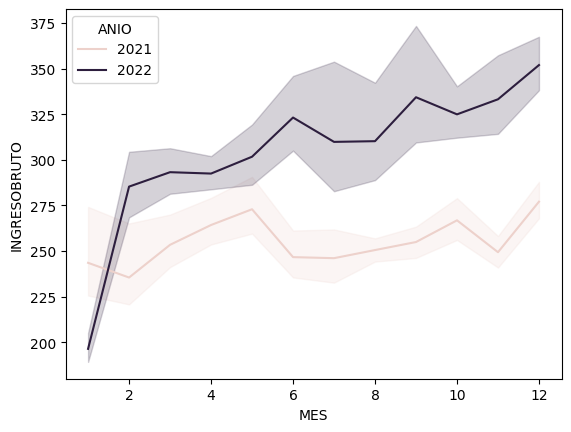

In [6]:
ts3 = sns.lineplot(
    data=ventas,
    x='MES',
    y='INGRESOBRUTO',
    hue='ANIO'
)

ts3

<Axes: xlabel='MES'>

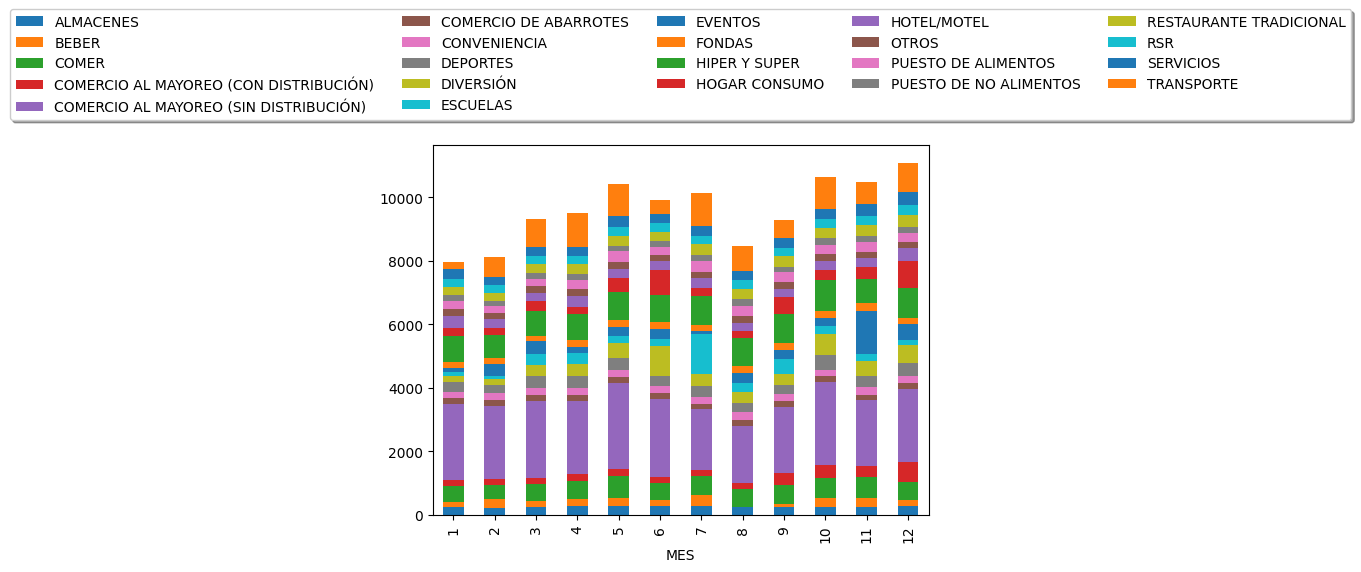

In [7]:
df_pivot = pd.pivot_table(ventas[ventas.ANIO == 2021], 
                          index='MES', 
                          columns='CANAL', 
                          values='INGRESOBRUTO', 
                          aggfunc='mean')

p = df_pivot.plot.bar(stacked=True)
plt.setp(p.get_legend().get_texts(), fontsize='6')
p.legend(bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True, loc = 'lower center')

p

<Axes: xlabel='MES'>

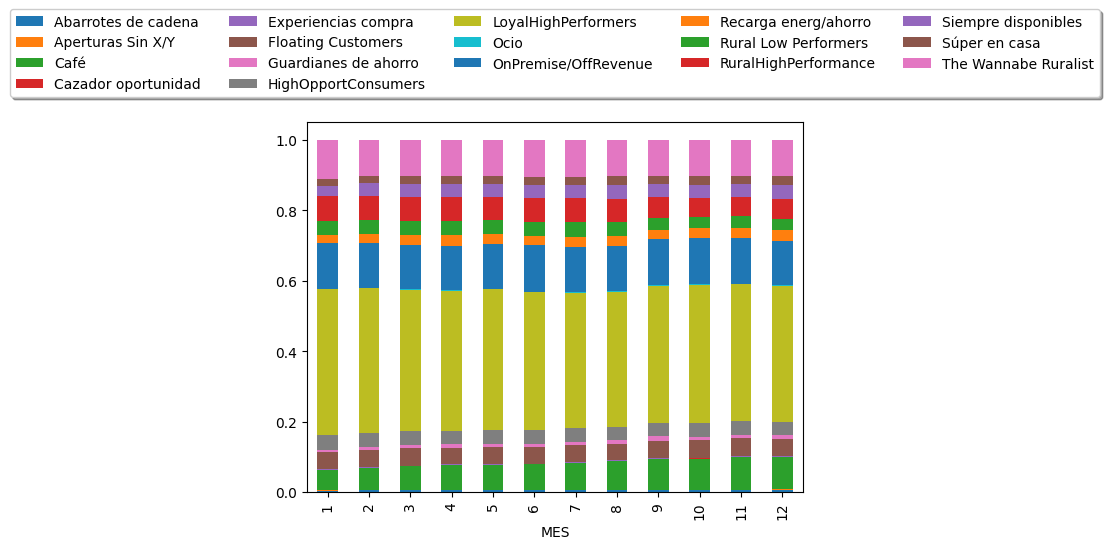

In [8]:
df_crosstab = pd.crosstab(
    index=ventas['MES'],
    columns=ventas['CLUSTERANALYTICS'],
    normalize="index"
)

p = df_crosstab.plot.bar(stacked=True)
plt.setp(p.get_legend().get_texts(), fontsize='6')
p.legend(bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True, loc = 'lower center')

p

In [25]:
h=sns.color_palette(n_colors=78)

In [ ]:
print(h.as_hex())

In [ ]:
pd.crosstab(
    index=ventas['CLUSTERANALYTICS'],
    columns=ventas['CANAL'],
    normalize="index").unstack().reset_index()

In [ ]:
sankey_crosstab[0]

In [34]:
# SANKEY DIAGRAM

col=['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd', '#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd', '#4c72b0', '#dd8452']

sankey_crosstab=pd.crosstab(
    index=ventas['CLUSTERANALYTICS'],
    columns=ventas['CANAL'],
    normalize="index").unstack().reset_index()

In [58]:
cluster_dict={}

cluster_dict['hola'] = 'saludo'
cluster_dict['adios'] = 'despedida'

In [ ]:
list(enumerate(ventas.CLUSTERANALYTICS.unique()))

In [65]:
cluster_dict={}

for x,y in enumerate(ventas.CLUSTERANALYTICS.unique()):
    cluster_dict[y] = x

canal_dict={}
for x,y in enumerate(ventas.CANAL.unique(), start= max(list(cluster_dict.values())) + 1):
    canal_dict[y] = x

In [74]:
sankey_crosstab['CANAL']

0       ALMACENES
1       ALMACENES
2       ALMACENES
3       ALMACENES
4       ALMACENES
          ...    
369    TRANSPORTE
370    TRANSPORTE
371    TRANSPORTE
372    TRANSPORTE
373    TRANSPORTE
Name: CANAL, Length: 374, dtype: object

In [76]:
sankey_crosstab['label'] = sankey_crosstab['CANAL'].str.lower()
sankey_crosstab['CANAL'] = [canal_dict[x] for x in sankey_crosstab['CANAL']]
sankey_crosstab['CLUSTERANALYTICS'] = [cluster_dict[x] for x in sankey_crosstab['CLUSTERANALYTICS']]
sankey_crosstab.columns = ['source','target','value','label']

In [84]:
for s, c in zip(set(sankey_crosstab['source']), col):
    sankey_crosstab.loc[sankey_crosstab['source'] == s,'color'] = c

In [86]:
link = {'value': sankey_crosstab['value'].to_list(),
        'label': sankey_crosstab['label'].to_list(),
        'color': sankey_crosstab['color'].to_list(),
        'source': sankey_crosstab['source'].to_list(),
        'target': sankey_crosstab['target'].to_list()}

In [91]:
data = go.Sankey(link = link,
                  node = dict(
                  pad = 15,
                  thickness = 20,
                  line = dict(color = "darkgrey", width = 0.5),
                  label = list(ventas.CLUSTERANALYTICS.unique()) + list(sankey_crosstab.label.unique()),
                  color = "black"
                ))

fig = go.Figure(data)
fig.update_layout(title_text="Canales y Clusters",
                  font_size=11)

fig.write_html("sankey_diagram.html")

In [92]:
%%html
<iframe src="sankey_diagram.html" width="1100" height="900" style="border:none"></iframe>

In [94]:
print(sns.color_palette(n_colors=45).as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
